### When we see the movie Dataset the first question that comes onto our mind is 'Ratings'. The following are the Research Questions that I am covering in this notebook

    
   -    1) What is the Film that has higher rating than other films
          
          
   -    2) Which Genre of the film that is likely to be rated high
          
          
   -    3) The most active user of this dataset (One who rated the most for movies)
    

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from os import chdir
import seaborn as sns
import numpy as np
chdir('/home/arsath/Downloads/ml-25m')

In [32]:
movies  = pd.read_csv('movies.csv',dtype={'movieId':np.int})
ratings = pd.read_csv('ratings.csv',dtype={'userId':np.int,'movieId':np.int,'rating':np.float,'timestamp':np.int})

In [33]:
movies['title']      = movies['title'].str.title()
movies['genres']     = movies['genres'].str.title() 
movies.drop_duplicates(subset = ['title'],keep = 'first',inplace = True)
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'],unit='s')
ratings.rename(columns = {'timestamp': 'DateTime'},inplace = True)
data_range = ratings['DateTime'].agg((min,max))
print(f"This Dataset is ranging From {data_range.loc['min'].strftime('%d-%m-%Y')} To {data_range.loc['max'].strftime('%d-%m-%Y') }")
print(91*'*')

This Dataset is ranging From 09-01-1995 To 21-11-2019
*******************************************************************************************


In [34]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting To Exhale (1995),Comedy|Drama|Romance
4,5,Father Of The Bride Part Ii (1995),Comedy


In [35]:
print(f"\nThis movies csv has {movies.shape[0]} Rows and {movies.shape[1]} Columns")
print(f"\nDoes this data contains any null values : {movies.isnull().any().any()}")
print(91*'*')


This movies csv has 62323 Rows and 3 Columns

Does this data contains any null values : False
*******************************************************************************************


In [36]:
ratings.head()

,userId,movieId,rating,DateTime
0,1,296,5.0,2006-05-17 15:34:04
1,1,306,3.5,2006-05-17 12:26:57
2,1,307,5.0,2006-05-17 12:27:08
3,1,665,5.0,2006-05-17 15:13:40
4,1,899,3.5,2006-05-17 12:21:50


In [37]:
print(f"\nThis ratings csv has {ratings.shape[0]} Rows and {ratings.shape[1]} Columns")
print(f"\nDoes this data contains any null values : {ratings.isnull().any().any()}")
print(91*'*')


This ratings csv has 25000095 Rows and 4 Columns

Does this data contains any null values : False
*******************************************************************************************


In [38]:
groups      = ratings.groupby('movieId',as_index=False)
counts_df   = groups['userId'].count()
mean_counts = counts_df['userId'].mean()
counts_df   = counts_df[counts_df['userId'] >= mean_counts]

In [39]:
merged_df   = movies.merge(counts_df['movieId'])
rate        = groups['rating'].mean()
merged_df   = merged_df.merge(rate).sort_values(by='rating',ascending = False)
merged_df

,movieId,title,genres,rating
5726,171011,Planet Earth Ii (2016),Documentary,4.483096
5639,159817,Planet Earth (2006),Documentary,4.464797
253,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576
5721,170705,Band Of Brothers (2001),Action|Drama|War,4.398599
596,858,"Godfather, The (1972)",Crime|Drama,4.324336
...,...,...,...,...
3475,6872,"House Of The Dead, The (2003)",Action|Horror,1.336538
4002,31698,Son Of The Mask (2005),Adventure|Children|Comedy|Fantasy,1.232227
3393,6587,Gigli (2003),Comedy|Crime|Romance,1.214380
4589,61348,Disaster Movie (2008),Comedy,1.205566


### BBC's Planet Earth is secured top 2 place of this dataset
### Shawshank Redemption is the First movie that secured 3 rd place in our dataset

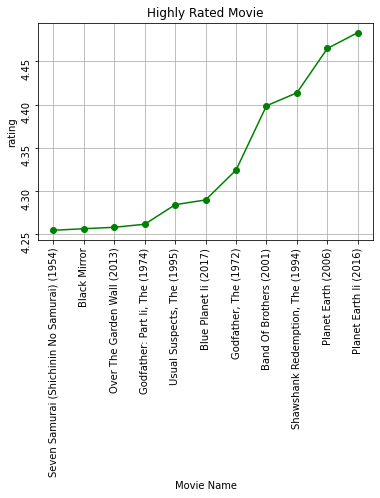

In [40]:
plt.plot(merged_df['title'][10::-1],merged_df['rating'][10::-1],'go-')
plt.title('Highly Rated Movie')
plt.xlabel('Movie Name')
plt.ylabel('rating')
plt.tick_params(rotation=90)
plt.grid(True)
plt.show()

### The Above plot shows that Planet Earth secured top 2 places in our dataset

In [41]:
top_genre = merged_df['genres'].value_counts(ascending = False)
print(top_genre)
print(91*'*')

Drama                                    570
Comedy                                   472
Comedy|Drama                             249
Comedy|Romance                           230
Drama|Romance                            229
                                        ... 
Adventure|Comedy|Crime|Thriller            1
Drama|Horror|Mystery|Romance|Thriller      1
Adventure|Horror|Sci-Fi                    1
Action|Fantasy|Thriller|Imax               1
Action|Animation|Mystery|Imax              1
Name: genres, Length: 752, dtype: int64
*******************************************************************************************


### The films which come under Drama Gendre are likely to be rated high

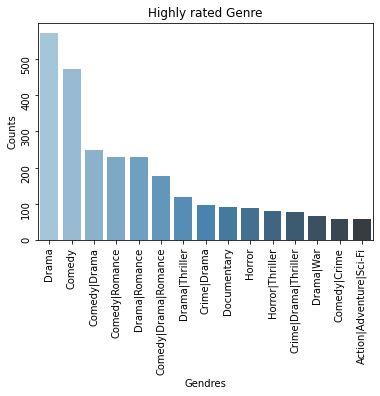

*******************************************************************************************


In [42]:
fig = sns.barplot(x = top_genre.index[:15],y = top_genre[:15],palette = 'Blues_d')
fig.set_title('Highly rated Genre')
fig.set_xlabel('Gendres')
fig.set_ylabel('Counts')
fig.tick_params(labelrotation=90)
plt.show()
print(91*'*')

### The Above plot shows that the Film which are of the Gendres Drama are rated highly.

In [43]:
active_user       = ratings.groupby('userId')['movieId'].count().sort_values(ascending = False)
active_user.rename('movie_count',inplace = True)
print(f'The Top 5 most active users in this dataset are \n\n{active_user.head()}')
print(91*'*')

The Top 5 most active users in this dataset are 

userId
72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
Name: movie_count, dtype: int64
*******************************************************************************************


### The Above Series shows that the user 72315 is the most active user among others and he is rated for 32202 films

In [49]:
ratings_mean = merged_df['rating'].mean()
highly_rated = merged_df[merged_df['rating'] >=  ratings_mean]
highly_rated

,movieId,title,genres,rating
5726,171011,Planet Earth Ii (2016),Documentary,4.483096
5639,159817,Planet Earth (2006),Documentary,4.464797
253,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576
5721,170705,Band Of Brothers (2001),Action|Drama|War,4.398599
596,858,"Godfather, The (1972)",Crime|Drama,4.324336
...,...,...,...,...
1733,2600,Existenz (1999),Action|Sci-Fi|Thriller,3.349642
3464,6832,Regarding Henry (1991),Drama,3.349628
3773,8376,Napoleon Dynamite (2004),Comedy,3.349476
3181,5679,"Ring, The (2002)",Horror|Mystery|Thriller,3.349474


In [44]:
# For Genral Audience

In [45]:
available_gendres = merged_df['genres'].str.split('|')

In [46]:
print(set(np.concatenate(available_gendres).flat),end='')
print(91*'*')

{'(No Genres Listed)', 'Crime', 'Action', 'Comedy', 'Fantasy', 'Musical', 'Horror', 'Drama', 'Children', 'Documentary', 'Thriller', 'Animation', 'Sci-Fi', 'Adventure', 'Mystery', 'Romance', 'Film-Noir', 'Western', 'War', 'Imax'}*******************************************************************************************


In [48]:
user_input = input('Enter the Genre of film to watch out for this weekend: ').title()
highly_rated[highly_rated['genres'].str.contains(user_input)]

Enter the Genre of film to watch out for this weekend: Drama


,movieId,title,genres,rating
253,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576
5721,170705,Band Of Brothers (2001),Action|Drama|War,4.398599
596,858,"Godfather, The (1972)",Crime|Drama,4.324336
829,1221,"Godfather: Part Ii, The (1974)",Crime|Drama,4.261759
5669,163809,Over The Garden Wall (2013),Adventure|Animation|Drama,4.258242
...,...,...,...,...
3668,7458,Troy (2004),Action|Adventure|Drama|War,3.351574
3530,7009,Lorenzo'S Oil (1992),Drama,3.350722
4344,51091,Black Snake Moan (2006),Drama,3.350417
3316,6281,Phone Booth (2002),Drama|Thriller,3.350393


### FINAL NOTE :

- This Dataset consists of TV Series and English movies.


- BBC's Planet Earth which is a TV Series secured top 2 places with a huge ratings of over 4.48.


- Shawshank Redemption is the First movie that secured 3 rd place in our dataset


- The films which come under Drama Gendre are likely to be rated high


- The most active user of this dataset are 72315,  80974  , 137293  ,  33844  ,  20055    ('THE ONE WHO ACTIVELY RATED FOR MOVIES')
